# Task 8 - 06 June 2025

# **Clustering with K-Means**

### *Importing Required Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


sns.set(style="whitegrid")


### *Loading the Dataset*

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### *Basic Dataset Info*

In [5]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
df.info()


Dataset Shape: (200, 5)

Column Names: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### *Exploratory Data Analysis*

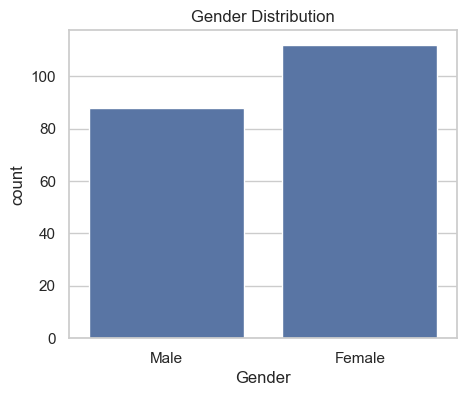

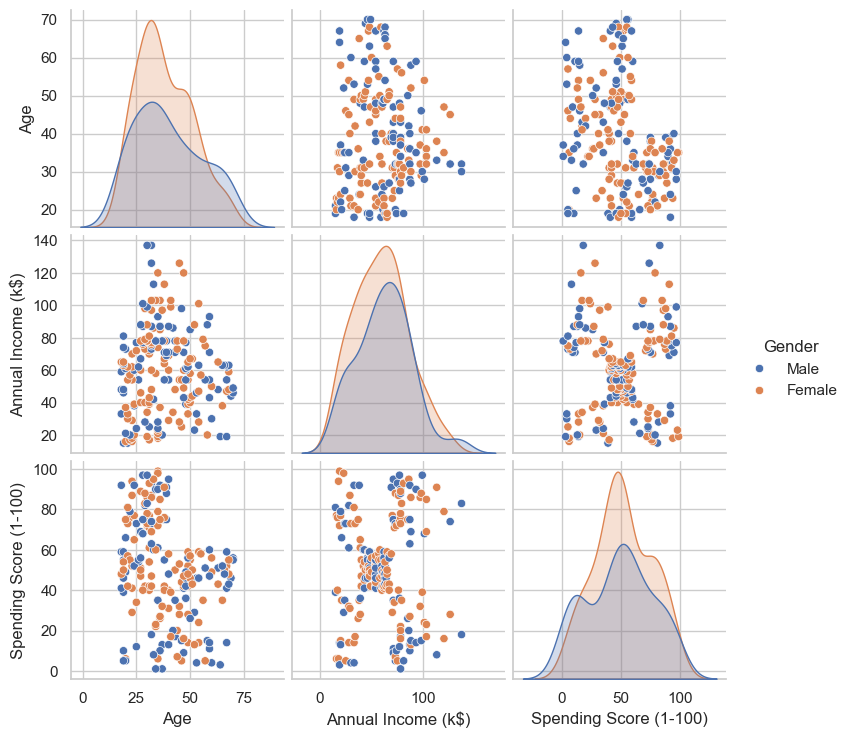

In [11]:
# Countplot for Gender 
plt.figure(figsize=(5, 4)) 
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

# Pairplot 
sns.pairplot(df.drop(['CustomerID'], axis=1), hue="Gender", height=2.5)  # Each subplot = 2.5 x 2.5
plt.show()


### *Data Preprocessing*

In [12]:
# Droping unnecessary columns
X = df.drop(['CustomerID', 'Gender'], axis=1)

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### *Dimensionality Reduction with PCA*

In [14]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Storing in DataFrame for plotting
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])


### *Elbow Method to Find Optimal K*

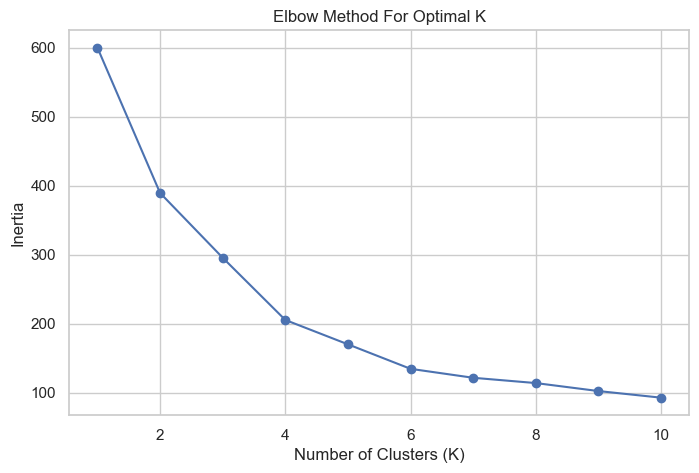

In [16]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


### *Applying KMeans (K=5)*

In [17]:
k_optimal = 5  # Based on Elbow plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


### *Visualize Clusters (PCA)*

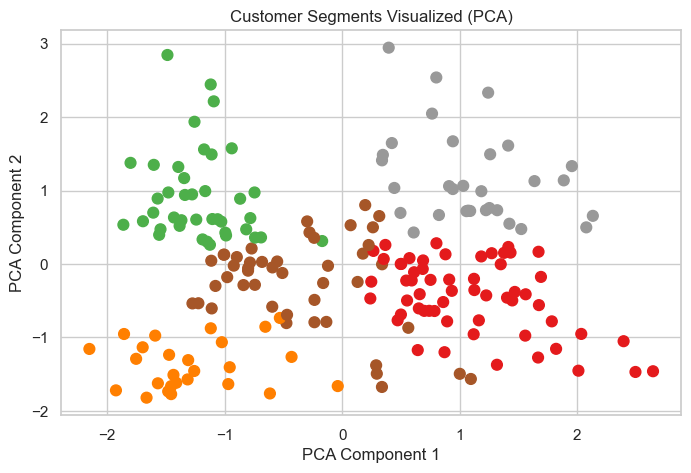

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=60)
plt.title('Customer Segments Visualized (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


### *Silhouette Score*

In [19]:
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for K={k_optimal}: {sil_score:.4f}")


Silhouette Score for K=5: 0.4085


### *Adding Cluster Labels to Original Data*

In [20]:
df['Cluster'] = clusters
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


### *Cluster Summary*

In [21]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         68.775862  55.275862           47.620690               41.706897
1        161.025000  32.875000           86.100000               81.525000
2         23.461538  25.769231           26.115385               74.846154
3         86.377778  26.733333           54.311111               40.911111
4        166.870968  44.387097           89.774194               18.483871
